In [1]:
import sys
sys.path.append("..\..")

from src.data.utils.melody_matcher import MelodyMatcher
from src.data.structures.melody import Melody

In [3]:
melody1 = Melody.from_midi("..\\..\\datasets\\melody_extraction\\test\\labels\\overlap_1.mid")
melody2 = Melody.from_midi("..\\..\\datasets\\melody_extraction\\test\\labels\\overlap_3.mid")

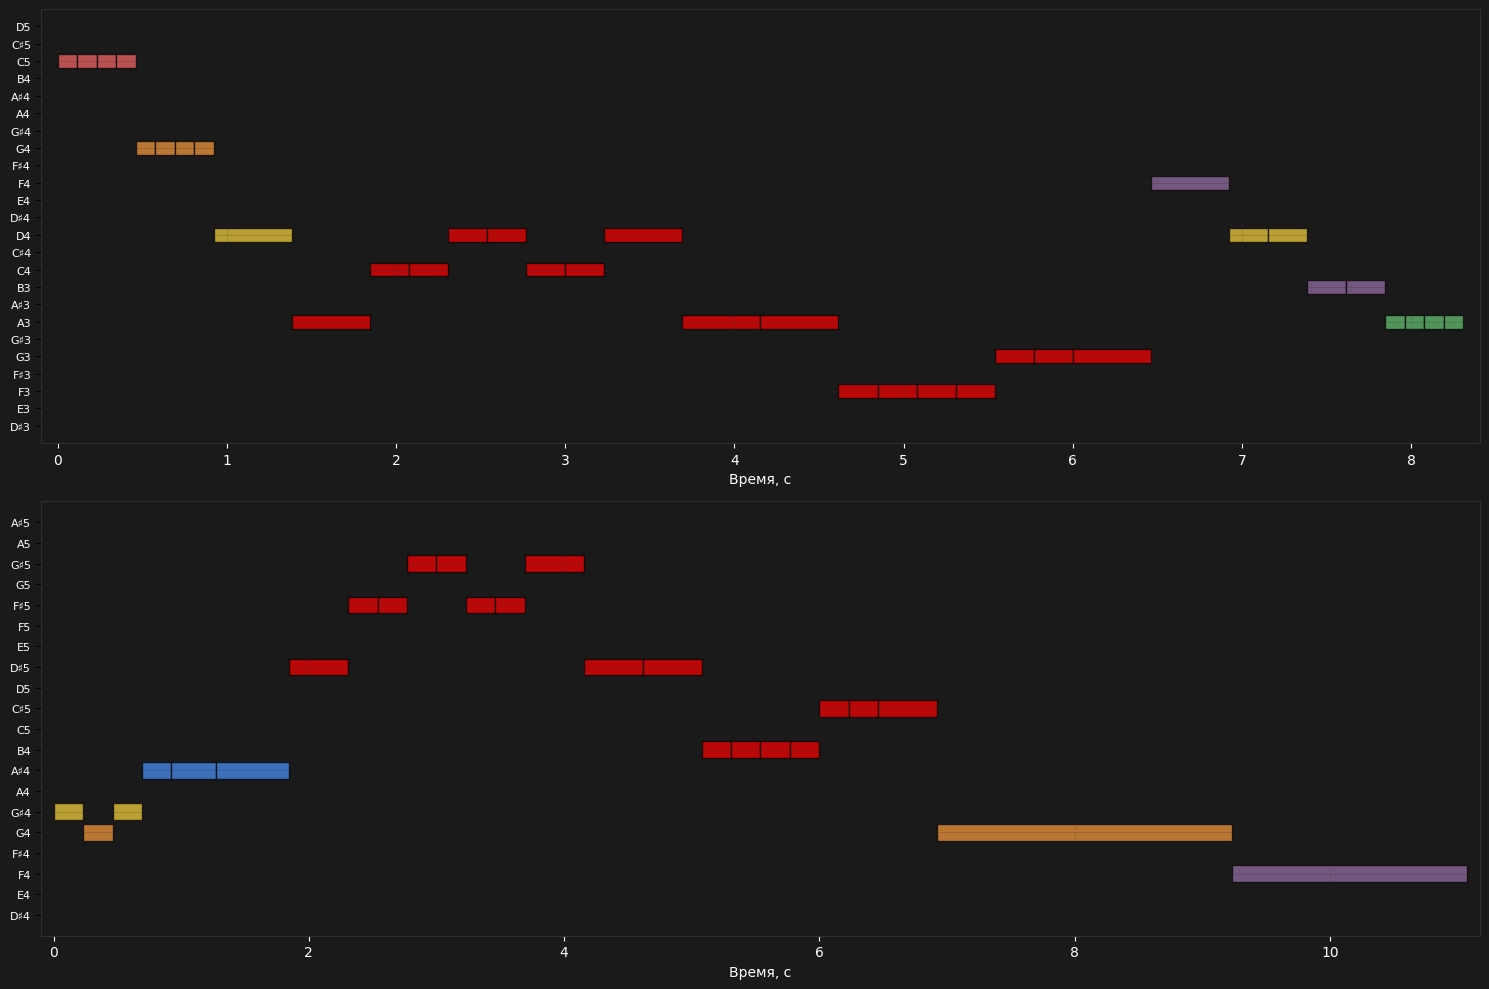

In [4]:
matcher = MelodyMatcher(melody1, melody2)
matcher.find_patterns(min_length=7)
matcher.visualize_matches()